# MNIST Digit Recognizing with CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

## Loading, preparing and exploring the dataset

In [19]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
y_train = train["label"]
x_train = train.drop(labels = ["label"], axis = 1)
del train

x_train.shape

(42000, 784)

In [20]:
# Reshaping for Keras
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

# Normalizing the values
x_train = x_train.astype("float")
test = test.astype("float")
x_train /= 255.0
test /= 255.0

In [21]:
# making the labels categorical
y_train = to_categorical(y_train, num_classes = 10)

In [22]:
# splitting the training data into training and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=2)

The label of this image is:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


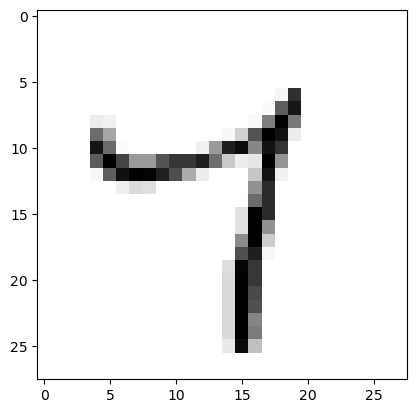

In [67]:
# checking out one random image and its label
print("The label of this image is: ", y_train[123])
plt.imshow(x_train[123], cmap="Greys")

## CNN
I'll try and compare the performance of having two Conv2D layers and Pooling layers once, twice and three times with ascending filter numbers (see below).
### Once the Conv2D layers and Pooling layer (32)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding = "Same", activation = "relu", input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3,3), padding = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=30, validation_data = (x_val, y_val))

### Twice the Conv2D and Pooling layers (32, 64)

In [63]:
model2triples = Sequential()
model2triples.add(Conv2D(32, kernel_size=(3,3), padding = "Same", activation = "relu", input_shape=(28, 28, 1)))
model2triples.add(Conv2D(32, kernel_size=(3,3), padding = "Same", activation = "relu"))
model2triples.add(MaxPooling2D(pool_size=(2, 2)))
model2triples.add(Dropout(0.4))

model2triples.add(Conv2D(64, kernel_size=(3,3), padding = "Same", activation = "relu"))
model2triples.add(Conv2D(64, kernel_size=(3,3), padding = "Same", activation = "relu"))
model2triples.add(MaxPooling2D(pool_size=(2, 2)))
model2triples.add(Dropout(0.4))

model2triples.add(Flatten())
model2triples.add(Dense(256, activation="relu"))
model2triples.add(Dropout(0.4))
model2triples.add(Dense(10,activation="softmax"))

In [64]:
model2triples.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])
model2triples.fit(x_train, y_train, epochs=30, validation_data = (x_val, y_val))

Epoch 1/30
1182/1182 [==============================] - 27s 22ms/step - loss: 0.2244 - accuracy: 0.9294 - val_loss: 0.0688 - val_accuracy: 0.9793
Epoch 2/30
1182/1182 [==============================] - 26s 22ms/step - loss: 0.0818 - accuracy: 0.9744 - val_loss: 0.0562 - val_accuracy: 0.9812
Epoch 3/30
1182/1182 [==============================] - 25s 21ms/step - loss: 0.0642 - accuracy: 0.9813 - val_loss: 0.0312 - val_accuracy: 0.9895
Epoch 4/30
1182/1182 [==============================] - 26s 22ms/step - loss: 0.0514 - accuracy: 0.9842 - val_loss: 0.0306 - val_accuracy: 0.9907
Epoch 5/30
1182/1182 [==============================] - 26s 22ms/step - loss: 0.0474 - accuracy: 0.9848 - val_loss: 0.0278 - val_accuracy: 0.9912
Epoch 6/30
1182/1182 [==============================] - 28s 24ms/step - loss: 0.0409 - accuracy: 0.9874 - val_loss: 0.0297 - val_accuracy: 0.9900
Epoch 7/30
1182/1182 [==============================] - 29s 24ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0262 -

### Three times the Conv2D and Pooling layers (24, 48, 64)

In [65]:
model3triples = Sequential()
model3triples.add(Conv2D(24, kernel_size=(3,3), padding = "Same", activation = "relu", input_shape=(28, 28, 1)))
model3triples.add(Conv2D(64, kernel_size=(3,3), padding = "Same", activation = "relu"))
model3triples.add(MaxPooling2D(pool_size=(2, 2)))
model3triples.add(Dropout(0.4))

model3triples.add(Conv2D(48, kernel_size=(3,3), padding = "Same", activation = "relu"))
model3triples.add(Conv2D(48, kernel_size=(3,3), padding = "Same", activation = "relu"))
model3triples.add(MaxPooling2D(pool_size=(2, 2)))
model3triples.add(Dropout(0.4))

model3triples.add(Conv2D(64, kernel_size=(3,3), padding = "Same", activation = "relu"))
model3triples.add(Conv2D(64, kernel_size=(3,3), padding = "Same", activation = "relu"))
model3triples.add(MaxPooling2D(pool_size=(2, 2)))
model3triples.add(Dropout(0.4))

model3triples.add(Flatten())
model3triples.add(Dense(256, activation="relu"))
model3triples.add(Dropout(0.4))
model3triples.add(Dense(10,activation="softmax"))

In [66]:
model3triples.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics=["accuracy"])
model3triples.fit(x_train, y_train, epochs=30, validation_data = (x_val, y_val))

Epoch 1/30
1182/1182 [==============================] - 42s 35ms/step - loss: 0.3419 - accuracy: 0.8884 - val_loss: 0.0593 - val_accuracy: 0.9848
Epoch 2/30
1182/1182 [==============================] - 39s 33ms/step - loss: 0.1015 - accuracy: 0.9701 - val_loss: 0.0464 - val_accuracy: 0.9879
Epoch 3/30
1182/1182 [==============================] - 40s 34ms/step - loss: 0.0783 - accuracy: 0.9764 - val_loss: 0.0371 - val_accuracy: 0.9902
Epoch 4/30
1182/1182 [==============================] - 41s 35ms/step - loss: 0.0672 - accuracy: 0.9797 - val_loss: 0.0385 - val_accuracy: 0.9883
Epoch 5/30
1182/1182 [==============================] - 41s 35ms/step - loss: 0.0612 - accuracy: 0.9818 - val_loss: 0.0324 - val_accuracy: 0.9898
Epoch 6/30
1182/1182 [==============================] - 40s 34ms/step - loss: 0.0540 - accuracy: 0.9836 - val_loss: 0.0322 - val_accuracy: 0.9910
Epoch 7/30
1182/1182 [==============================] - 40s 34ms/step - loss: 0.0511 - accuracy: 0.9849 - val_loss: 0.0339 -

## Evaluation

### Confusion matrix

In [26]:
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred,axis = 1)
y_true = np.argmax(y_val,axis = 1) 
confusion_matrix(y_true, y_pred_classes)

132/132 [==============================] - 2s 13ms/step


array([[401,   0,   3,   0,   0,   0,   3,   1,   0,   0],
       [  0, 469,   1,   0,   0,   0,   0,   1,   0,   0],
       [  0,   1, 413,   0,   3,   0,   0,   1,   1,   1],
       [  0,   0,   1, 499,   0,   2,   0,   1,   3,   0],
       [  0,   0,   0,   0, 386,   0,   2,   1,   0,   8],
       [  0,   0,   1,   3,   0, 329,   1,   0,   1,   4],
       [  2,   0,   1,   0,   0,   1, 396,   0,   2,   0],
       [  0,   0,   4,   0,   0,   0,   0, 430,   0,   4],
       [  1,   0,   2,   2,   1,   1,   0,   1, 395,   0],
       [  0,   0,   1,   2,   0,   0,   0,   1,   2, 410]], dtype=int64)

### Running it on the test set and preparing the submission file

In [ ]:
# predicting the test set images
results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [30]:
# converting the dataframe into a csv file
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("./data/first_cnn.csv",index=False)